### Author: Premdiles, Marius A.
### Updated: 07/04/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from functools import cache

# Preface

This will be an overview of the CYK Algorthm aka. (Cocke–Younger–Kasami algorithm):
1. It used Chomsky's Normal Form which helps solves word problems for context-free grammars(CFG).
1. Mostly seen in reecursive algorithms to make it more efficient by storing values of intermediate calculations.  
1. Widely used in almost every artificial intellige
1. It shows up in a LOT of job interviews.

Regarding the last point, I will clarify that it is entirely possible you will take a job with programming and *never* use dynamic programming.  
You *might* if you go to a big tech company, do operations research, or something similar.  
But it shows up in technical interviews, particularly for top-level jobs, because it's a very good litmus test.  
If you understand dynamic programming, you almost certainly know all of data structures and algorithms and (more importantly) how to apply them to a job.  

# Grammar

The main definition of this is "rules of a language governing sounds, words, sentences, and other elements, as well as their interpretations and combinations".
It is also exists in the field of linguistics.
An underlying structure of every language to any native speaker.
It can also be used in the field of computer science by perfoming derivation steps that change strings to other strings and etc.
Think of it as a law placed by the people but substitute the people with words in the making of each sentences.

Features of Grammar

1. *Phology* - study of sound patterns that occurin in languages.
1. *Morphology* - study of constructions of words.
1. *Syntax* - study of formation of words, clauses, phrases.
1. *Semantics* - study of meaning in natural and artificial languages.

These basically constructs the foundation of what we call grammar.
Communications between humans is the most fundamental aspect of an everyday life of each individual human. 
With this, it creates a system where everyone is connected in one way or another which makes a society.
This can be associated with technology as well.

As you can observe, every program and system that you see/use in your everyday life, uses a different programming language for it give an output.
Grammar is not only present in words itself. 
It can be translated into the realms of programming and dynamic coding.








# Context-Free Grammar

With the definiition of grammar clear, this is an application of it. But in a sense of programming. Like laws in a society, there are rules that can say how strings in each class are constructed. They may use:

* Symbols of the alphabet
* Strings that are already known to be in on of the classes
* or both

Using this idea, you can make a formal system that can make use of languages a.k.a [context-free language (CFLs)](https://www.geeksforgeeks.org/theory-of-computation/various-properties-of-context-free-languages-cfl/). The purpose of this is:

* *Production Rule* - having a set of rules when listing all strings in a language
* it has the ability to extend the capabilities of regular expressions

Here's a good example:

Visualize it as grammar is a tuple that consists of (V, T, P, S) where:

* V is the set of variables that are finite. And each variable represent a language which are set of strings

* T is the set of terminals that are finite which have symbols that form strings from languages that are being defined.

* P is the set production rules that represents the recursive definition of languages

* S is the start symbol which gives the definition to the languages

Production Rule of the form:

$$ A → a$$
$$ where, \; a = {V \cup T}^* \; and \; A ∈ V$$

Visual Representation below:





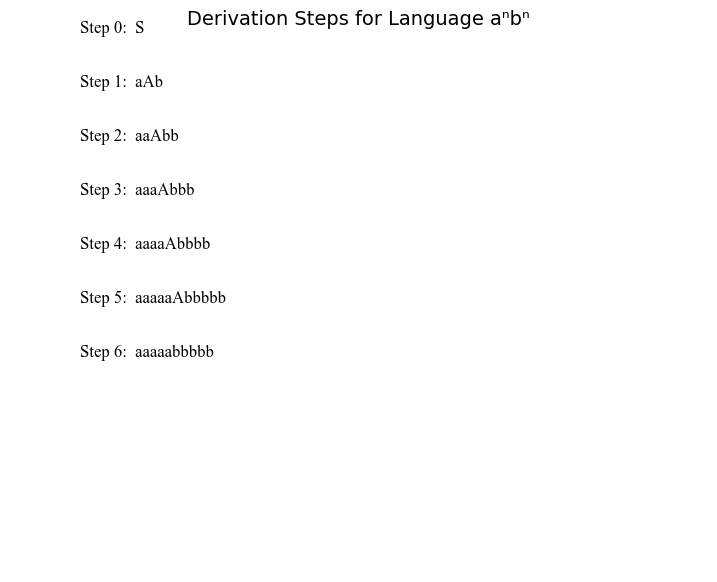

In [2]:
### Test Code:

#  Define the production rules
def derive(cfg_string):
    if 'S' in cfg_string:
        return [cfg_string.replace('S', 'aAb', 1)]
    elif 'A' in cfg_string:
        return [cfg_string.replace('A', 'aAb', 1), cfg_string.replace('A', '', 1)]
    return []

def visualize_derivation(steps):
    plt.figure(figsize=(9, len(steps)))
    plt.axis('off')

    for i, step in enumerate(steps):
        plt.text(0.1, 1 - i * 0.1, f"Step {i}:  {step}", fontsize=12, family='Times New Roman')

    plt.title("Derivation Steps for Language aⁿbⁿ", fontsize=14)
    plt.show()

# This makes the derivation from each variable from its on respected factor
def generate_anbn(n):

    steps = []
    current = 'S'
    steps.append(current)

    # We substitute the variable S with 'aAb'
    current = current.replace('S', 'aAb')
    steps.append(current)

    # Substitute A to 'aAb', (n-1) times
    for _ in range(n - 1):
        current = current.replace('A', 'aAb', 1)
        steps.append(current)

    # Replacing 'A' with ε
    current = current.replace('A', '', 1)
    steps.append(current)

    return steps

# Example usage:
n = 5  # You can change this value
steps = generate_anbn(n)
visualize_derivation(steps)


### Context-Free Grammar vs. Context-Sensitive Grammar





# Parsing and Formal Grammar

As we have defined earlier, grammar is basically rules which are implemented in sentences and strings. Imagine parsing as like figuring out whether a sentence "makes sense" based on grammar rules.Connecting this into computer science, parsing helps a program break down a sentence (or input) and check its structure.

Visualize making a sandwich or building a LEGO model:

- Grammar rules are like step-by-step instructions.

- Parsing is checking if you followed the instructions correctly.

In language, the sentence “The dog runs” makes sense, but “Runs the dog” sounds off.
Parsing helps a computer figure out the same thing — whether the structure is valid.

We use something called a syntax tree to represent the structure of a sentence. Each "branch" of the tree shows how small parts come together to make the full sentence.


In [3]:
## Make a parsing tree (MST)

**Explaining what is happening in the code and what is happening.**

### Chomsky's Normal Form

*Write about rule formats and place visual representations of trees and formating*

### Dynamic programming for parsing

*Visual representation of dp table*

# CYK Algorithm and Implementation
The CYK algorithm (Cocke–Younger–Kasami) is a bottom-up parsing algorithm used to determine if a string can be generated by a context-free grammar (CFG) in Chomsky Normal Form (CNF).

It constructs a dynamic programming table to evaluate all possible ways to derive substrings of the input from grammar rules. If the start symbol of the grammar derives the entire input string, the string is accepted by the grammar.

- **Goal:** Determine if a string `w` belongs to the language generated by a CFG.
- **Input:** A CNF grammar and an input string of `n` words.
- **Output:** Yes/No (Is the string derivable from the grammar?)

**Key Idea:**\
It constructs a triangular table `T[i][j]`, where each cell contains the set of non-terminals that can generate the substring `w[i..j]`.

**Time Complexity:** O(n³ * |P|), where |P| is the number of productions.


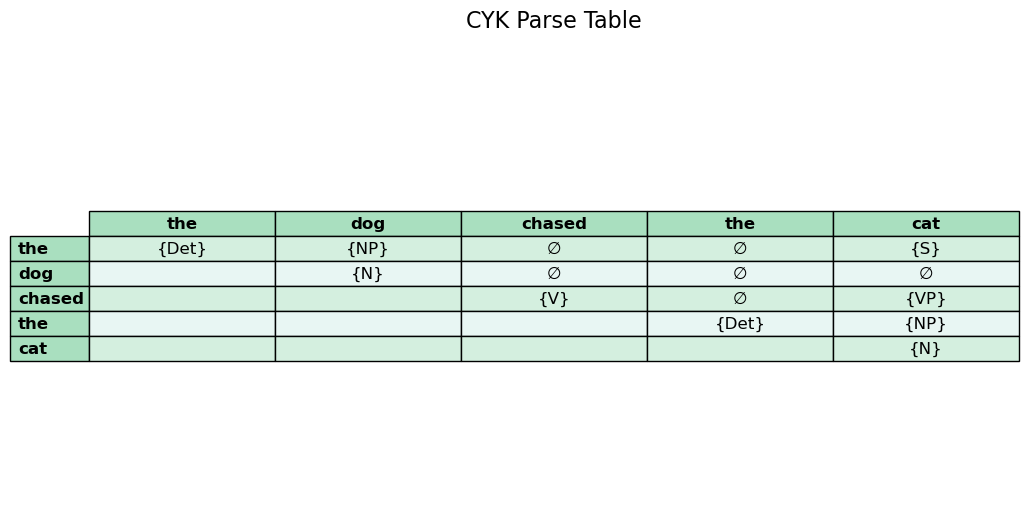

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example sentence and CYK table (parsed output as sets)
sentence = ["the", "dog", "chased", "the", "cat"]
cyk_table = [
    [{"Det"}, {"NP"}, set(), set(), {"S"}],
    [None, {"N"}, set(), set(), set()],
    [None, None, {"V"}, set(), {"VP"}],
    [None, None, None, {"Det"}, {"NP"}],
    [None, None, None, None, {"N"}]
]

# Helper to format cells
def format_cell(cell):
    if isinstance(cell, set) and cell:
        return "{" + ",".join(sorted(cell)) + "}"
    elif isinstance(cell, set):
        return "∅"
    return ""

# Format table
formatted_table = [
    [format_cell(cell) for cell in row] for row in cyk_table
]

# Make a DataFrame
df = pd.DataFrame(formatted_table, columns=sentence, index=sentence)

# Plot table with style
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df.values,
    rowLabels=df.index,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor("#a9dfbf")  # header green
    elif row % 2 == 0:
        cell.set_facecolor("#e8f6f3")  # light green
    else:
        cell.set_facecolor("#d4efdf")  # darker green

plt.title("CYK Parse Table", fontsize=16, pad=20)
plt.show()


### CYK Table Interpretation

The table above represents the **CYK parse table** generated for the input sentence:  
**"the dog chased the cat"** using a grammar in **Chomsky Normal Form (CNF)**.

#### Diagonal Cells (Base Case)
- These represent the terminal words in the sentence.
- Each word is matched with a rule that directly generates it.
- Example:  
  - `"the"` → `{Det}`  
  - `"dog"` → `{N}`  
  - `"chased"` → `{V}`

#### Above-Diagonal Cells
- These show all **valid combinations of non-terminals** that can derive substrings of length ≥ 2.
- Built using binary production rules from the grammar.
- Example rules:  
  - `NP → Det N`  
  - `S → NP VP`

#### Empty Cells (∅)
- These indicate **no valid derivation** exists for the given substring.
- Helps identify parsing paths that fail under the current grammar.

> The sentence is **grammatically valid** if the start symbol (e.g., `S`) appears in the **top-right cell** of the table.


# Extensions

*When CNF conversion is a problem*
*Efficiency and limitations*
 

# Summary